### Find out and remove outliers from Credit card data


#### Information about Credit Card Fraud Detection:

- The datasets contains transactions made by credit cards in September 2013 by european cardholders.
- This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions.
- It contains only numerical input variables which are the result of a PCA transformation.
- Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.



#### Features Information:

- (i). Amount: is the transaction Amount
- (ii). Time : contains the seconds elapsed between each transaction and the first transaction in the dataset.
- (iii).V1,V2,....V28: are the principal components obtained with PCA.
- (IV). Class: fraud =1,otherwise =0



**Link:** https://www.kaggle.com/mlg-ulb/creditcardfraud


In [24]:
# import the required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# load the Credit Card Fraud Detection dataset
# recap the the dataset

credit = pd.read_csv('creditcard.csv')
credit.head() # show the 5 datapoints of dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# change column Class to Fraud
credit = credit.rename(columns= {'Class':'Fraud'})
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# split the  features and lables
X = credit.iloc[:,:-1] 
y = credit.iloc[:,-1]


In [5]:
# Dataset is very large,so we should standardize the data
# StandardScaler(): Standardize features by removing the mean and scaling to unit variance

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [6]:
# IMPORT the PCA scikit-learn library
from sklearn.decomposition import PCA
pca = PCA() # pca() function
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

### Find out and remove outliers from Credit card data

In [7]:
from sklearn.neighbors import LocalOutlierFactor



In [8]:
%%time

lof = LocalOutlierFactor(n_jobs=-1) # n_jobs = -1 means that use all cores of cpu
lof.fit(X_scaled)

Wall time: 40min 26s


(0, 0.1)

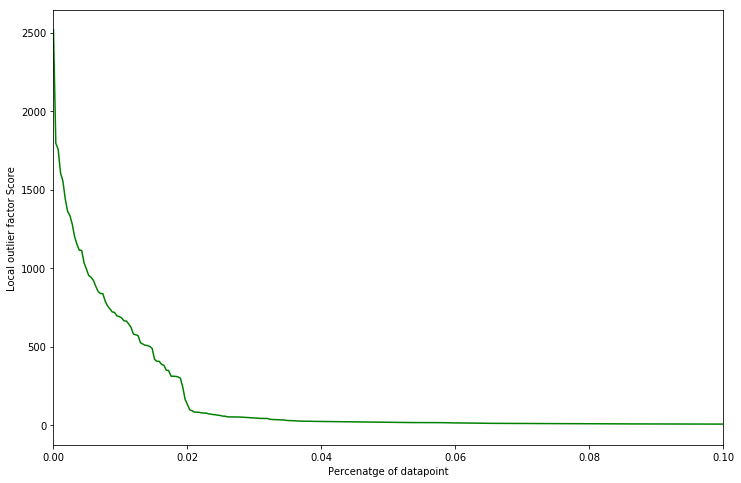

In [25]:
lof_score = -np.sort(lof.negative_outlier_factor_) # """" negative_outlier_factor_:  The opposite LOF of the training samples. The lower, the more abnormal. Inliers tend to have a LOF score close to 1, while outliers tend to have a larger LOF score.""""

plt.figure(figsize=(12, 8))
plt.plot(np.linspace(0, 100, len(lof_score)), lof_score,color  ='green')
plt.ylabel('Local outlier factor Score')
plt.xlabel('Percenatge of datapoint')
plt.xlim((0, 0.1))

# Local Outlier Factor  score of each datapoint sorted in descending order
# negative sign means that convert neagtive to positive


- LOF start at 0.02 % of datapoits and we are getting elbow shape at 0.02%
- choose contamination = 0.02%

In [13]:
%%time 

lof.contamination = 0.02 / 100
inliers = lof.fit_predict(X_scaled)

Wall time: 41min 43s


In [14]:
# count the total numbers of outliers

(inliers == -1).sum()


57

In [15]:
y[inliers == -1].value_counts()

0    57
Name: Fraud, dtype: int64

In [18]:
# here we have Removed the  outliers
X_cleaned_scaled = X_scaled[inliers == 1]
y_cleaned = y[inliers == 1]

In [23]:
X_cleaned_scaled #x_ceaned_sclaed outliers


array([[-1.99658302, -0.69424232, -0.04407492, ...,  0.33089162,
        -0.06378115,  0.24496426],
       [-1.99658302,  0.60849633,  0.16117592, ..., -0.02225568,
         0.04460752, -0.34247454],
       [-1.99656197, -0.69350046, -0.81157783, ..., -0.13713686,
        -0.18102083,  1.16068593],
       ...,
       [ 1.6419735 ,  0.98002374, -0.18243372, ...,  0.01103672,
        -0.0804672 , -0.0818393 ],
       [ 1.6419735 , -0.12275539,  0.32125034, ...,  0.26960398,
         0.31668678, -0.31324853],
       [ 1.64205773, -0.27233093, -0.11489898, ..., -0.00598394,
         0.04134999,  0.51435531]])

In [21]:
y_cleaned.head() #y_cleaned outliers

0    0
1    0
2    0
3    0
4    0
Name: Fraud, dtype: int64